In [ ]:
# heart_failure_clinical_records_dataset.csv

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [31]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [32]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [34]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [35]:
# df['sex'].replace(to_replace={0:'F',1:'M'}, inplace=True)

In [36]:
df['sex']

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

In [37]:

df['age']

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

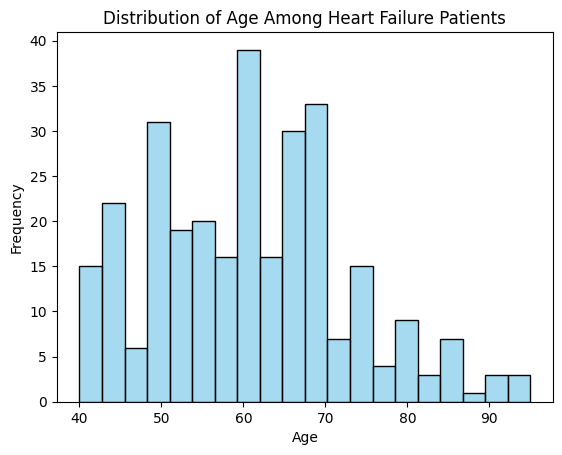

In [38]:
sns.histplot(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Among Heart Failure Patients')
plt.show()


In [39]:
#  2 How does the death rate vary with age

In [74]:
death_rate = df.groupby('age')['DEATH_EVENT'].mean()*100

In [75]:
death_rate

age
40.000      0.000000
41.000      0.000000
42.000     14.285714
43.000      0.000000
44.000      0.000000
45.000     31.578947
46.000     33.333333
47.000      0.000000
48.000    100.000000
49.000     25.000000
50.000     29.629630
51.000     25.000000
52.000      0.000000
53.000     10.000000
54.000     50.000000
55.000     17.647059
56.000      0.000000
57.000     50.000000
58.000     20.000000
59.000     75.000000
60.000     39.393939
60.667     50.000000
61.000      0.000000
62.000     20.000000
63.000      0.000000
64.000      0.000000
65.000     30.769231
66.000      0.000000
67.000      0.000000
68.000     40.000000
69.000     66.666667
70.000     28.000000
72.000     71.428571
73.000     25.000000
75.000     54.545455
77.000     50.000000
78.000      0.000000
79.000      0.000000
80.000     71.428571
81.000      0.000000
82.000    100.000000
85.000     50.000000
86.000    100.000000
87.000    100.000000
90.000     66.666667
94.000    100.000000
95.000    100.000000
Name: DEA

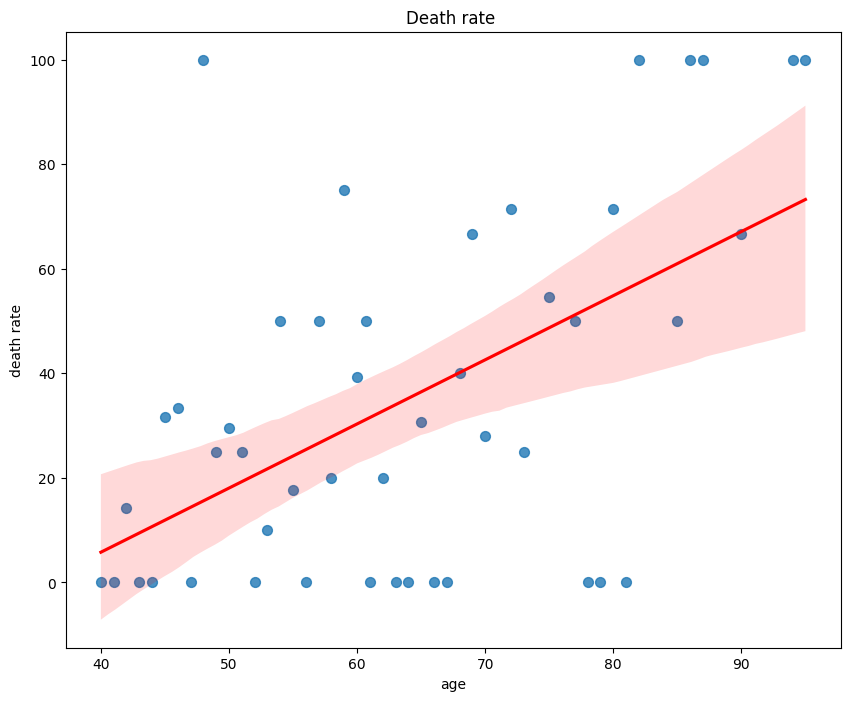

In [84]:
death_rate = death_rate.reset_index()  # Reset index for Seaborn

plt.figure(figsize = (10,8))
sns.regplot(x='age', y='DEATH_EVENT', data=death_rate, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Death rate ")
plt.xlabel('age')
plt.ylabel('death rate')
plt.show()

<Axes: xlabel='age', ylabel='DEATH_EVENT'>

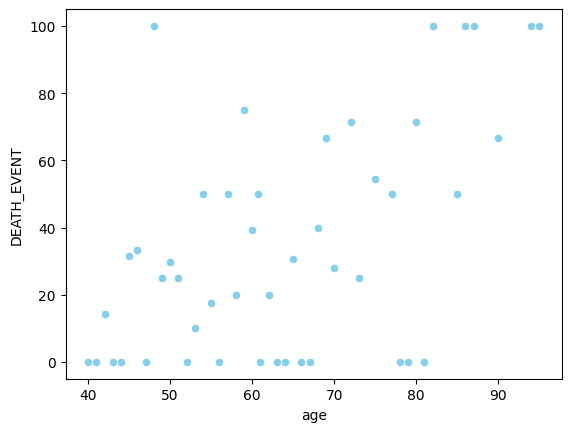

In [83]:
sns.scatterplot(x='age', y='DEATH_EVENT', data=death_rate, marker='o', color='skyblue')


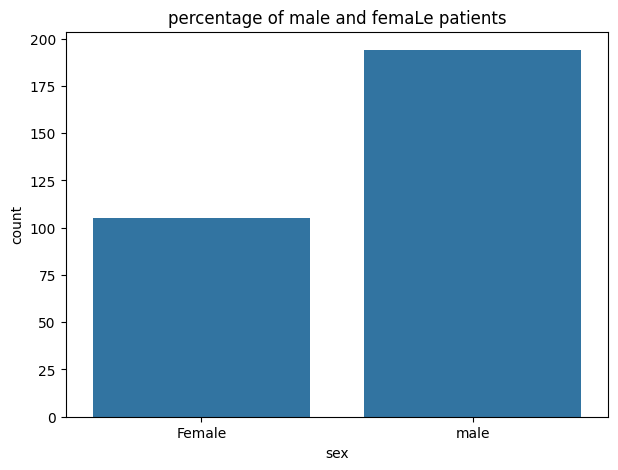

In [107]:
#  3 What is the percentage of male and female patients in the dataset?
plt.figure(figsize = (7, 5))
sns.countplot(x = 'sex', data =df)
plt.title('percentage of male and femaLe patients')
plt.xlabel('sex')
plt.ylabel('count')
plt.xticks(ticks=[0, 1], labels=['Female', 'male'])
plt.show()

<Axes: ylabel='sex'>

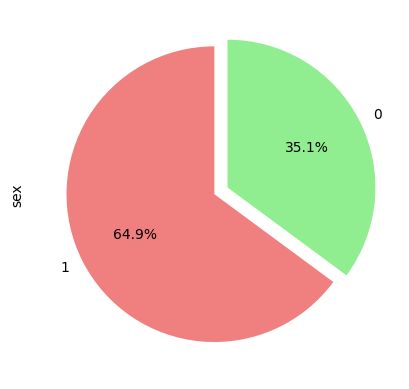

In [41]:
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], explode=(0, 0.1), startangle=90)

<ipython-input-109-aa41092de82f>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Percentage', data=gender_df, palette=['skyblue', 'salmon'])
<ipython-input-109-aa41092de82f>:20: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 100,10)  # Set y-axis limits from 0 to 100


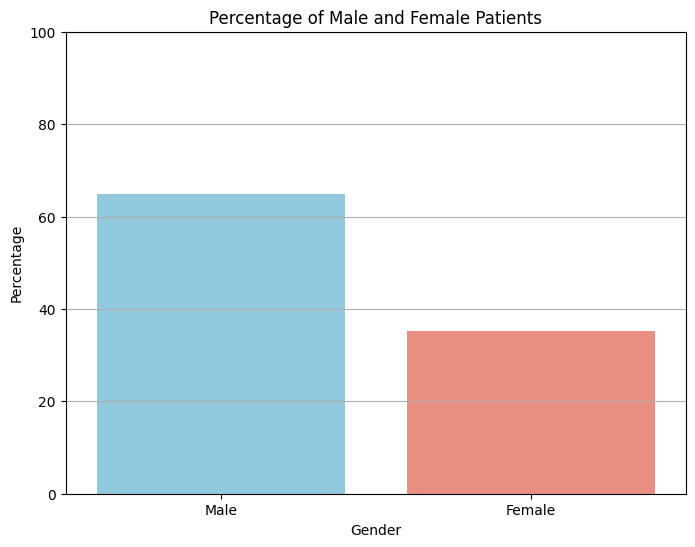

In [109]:
male_count = (df['sex'] == 1).sum()  # Assuming 1 represents male
female_count = (df['sex'] == 0).sum()  # Assuming 0 represents female

# Calculate the total number of patients
total_patients = len(df)

# Calculate the percentage of male and female patients
male_percentage = (male_count / total_patients) * 100
female_percentage = (female_count / total_patients) * 100

# Create a DataFrame for plotting
gender_df = pd.DataFrame({'Gender': ['Male', 'Female'], 'Percentage': [male_percentage, female_percentage]})

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Percentage', data=gender_df, palette=['skyblue', 'salmon'])
plt.title('Percentage of Male and Female Patients')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100,10)  # Set y-axis limits from 0 to 100
plt.grid(axis='y')
plt.show()

In [ ]:
# percentage of male 64.9%
# percentage of female 35.1%


In [42]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [43]:
grouped_single = df.groupby('age')['platelets'].count()


In [44]:
grouped_single


age
40.000     7
41.000     1
42.000     7
43.000     1
44.000     2
45.000    19
46.000     3
47.000     1
48.000     2
49.000     4
50.000    27
51.000     4
52.000     5
53.000    10
54.000     2
55.000    17
56.000     1
57.000     2
58.000    10
59.000     4
60.000    33
60.667     2
61.000     4
62.000     5
63.000     8
64.000     3
65.000    26
66.000     2
67.000     2
68.000     5
69.000     3
70.000    25
72.000     7
73.000     4
75.000    11
77.000     2
78.000     2
79.000     1
80.000     7
81.000     1
82.000     3
85.000     6
86.000     1
87.000     1
90.000     3
94.000     1
95.000     2
Name: platelets, dtype: int64

<ipython-input-45-071dcb662cca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_single.index, y=grouped_single.values, palette='pastel')


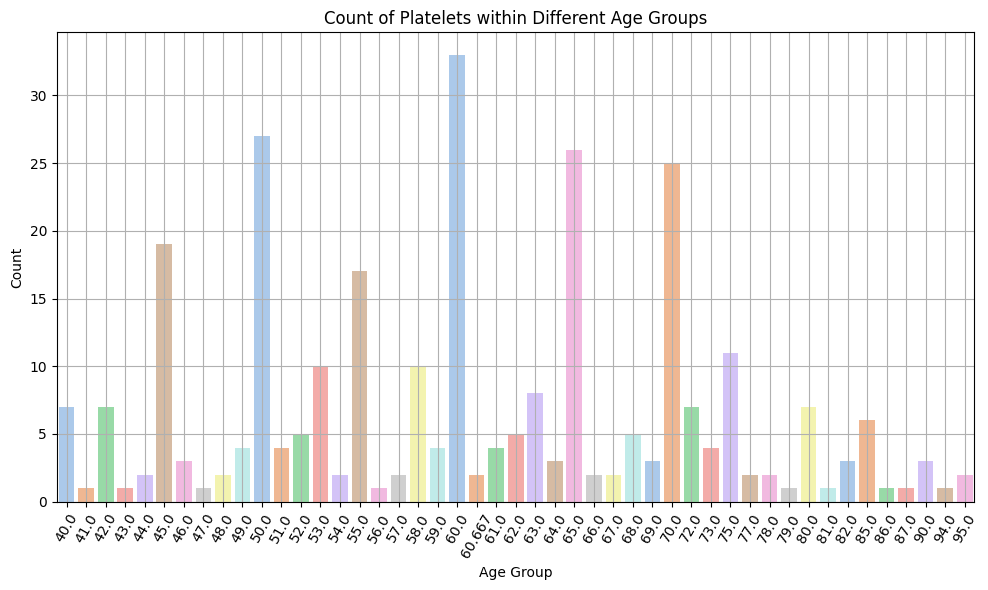

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_single.index, y=grouped_single.values, palette='pastel')
plt.grid(True)
plt.title('Count of Platelets within Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [46]:
# insight
'''
While there isn't a consistent linear trend, certain age groups seem to have higher platelet counts
compared to others. For instance, individuals in their 50s and 60s tend to have higher platelet counts, with peaks observed at ages 50,
60, and 65.

There is noticeable variability in platelet counts even within narrow age ranges.
For instance, at age 60, platelet counts vary from 33 to 2, highlighting individual differences that may be influenced
by various factors such as genetics, lifestyle, and health status.


'''


"\nWhile there isn't a consistent linear trend, certain age groups seem to have higher platelet counts \ncompared to others. For instance, individuals in their 50s and 60s tend to have higher platelet counts, with peaks observed at ages 50,\n60, and 65.\n\nThere is noticeable variability in platelet counts even within narrow age ranges. \nFor instance, at age 60, platelet counts vary from 33 to 2, highlighting individual differences that may be influenced \nby various factors such as genetics, lifestyle, and health status.\n\n\n"

In [47]:
# 5
# Is there a correlation between creatinine and sodium levels in the blood?

In [48]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Correlation coefficient between Creatinine and Sodium: -0.1890952100911741


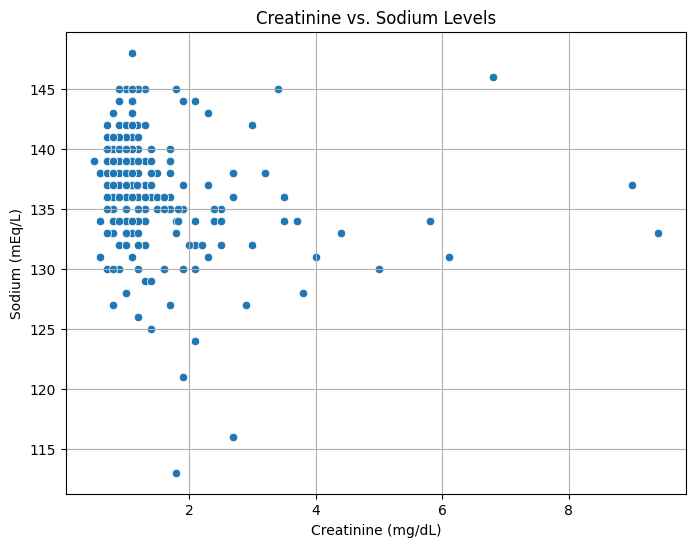

In [49]:
plt.figure(figsize=(8, 6))
correlation = df['serum_creatinine'].corr(df['serum_sodium'])
print("Correlation coefficient between Creatinine and Sodium:", correlation)

sns.scatterplot(x='serum_creatinine', y='serum_sodium', data=df)
plt.title('Creatinine vs. Sodium Levels')
plt.xlabel('Creatinine (mg/dL)')
plt.ylabel('Sodium (mEq/L)')
plt.grid(True)
plt.show()


In [50]:
# 6
# how does the prevalence of high blood pressure differ between male and female patients?

Prevalence of high blood pressure among male patients: 0.31443298969072164
Prevalence of high blood pressure among female patients: 0.41904761904761906


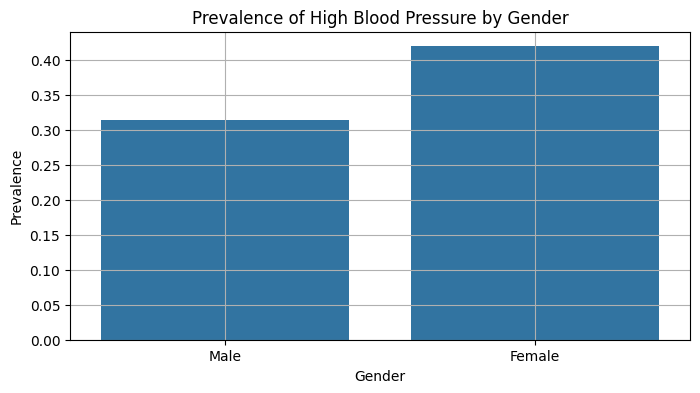

In [62]:
male_hbp_prevalence = df[df['sex'] == 1]['high_blood_pressure'].mean()
female_hbp_prevalence = df[df['sex'] == 0]['high_blood_pressure'].mean()

# Print the calculated prevalences
print("Prevalence of high blood pressure among male patients:", male_hbp_prevalence)
print("Prevalence of high blood pressure among female patients:", female_hbp_prevalence)

# Visualize the prevalence using a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=['Male', 'Female'], y=[male_hbp_prevalence, female_hbp_prevalence])
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence')
plt.grid(True)
plt.show()


In [ ]:
'''The analysis reveals that the prevalence of high blood pressure is higher among female patients (41.90%) compared to
male patients (31.44%). This gender disparity underscores the importance of gender-specific approaches to screening, monitoring,
and managing hypertension to effectively address cardiovascular health disparities.





'''

In [63]:
# 7 what is the relationship between smoking habits and the occurrence of heart failure?


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [89]:
smoking_heart_failure = df.groupby('smoking')['DEATH_EVENT'].mean() * 100
smoking_heart_failure

smoking
0    32.512315
1    31.250000
Name: DEATH_EVENT, dtype: float64

<ipython-input-94-148f05d65234>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoking', y='DEATH_EVENT', data=smoking_heart_failure, palette=['skyblue', 'salmon'])


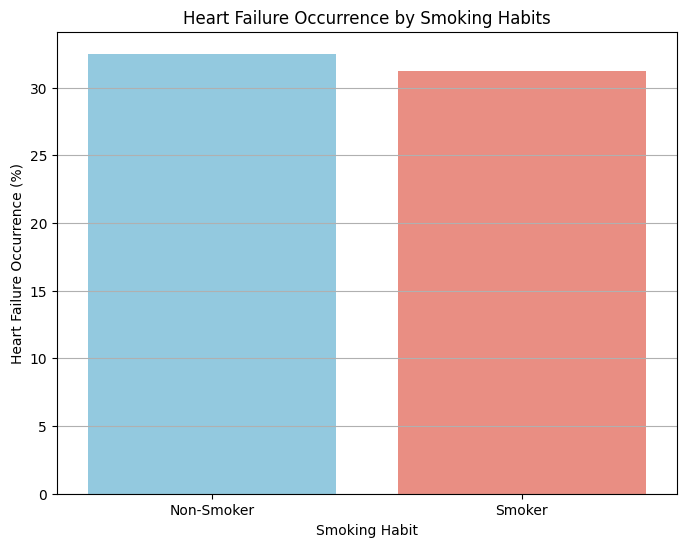

In [94]:
smoking_heart_failure = smoking_heart_failure.reset_index()  # Reset index for Seaborn

plt.figure(figsize=(8, 6))
sns.barplot(x='smoking', y='DEATH_EVENT', data=smoking_heart_failure, palette=['skyblue', 'salmon'])
plt.title('Heart Failure Occurrence by Smoking Habits')
plt.xlabel('Smoking Habit')
plt.ylabel('Heart Failure Occurrence (%)')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.grid(axis='y')
plt.show()


In [ ]:
"""
The calculated values in the smoking_heart_failure DataFrame represent the occurrence of heart failure events for
 each category in the 'smoking' column. It appears that the occurrence of heart failure events is
 approximately 32.51% for one category and 31.25% for another category.


"""

In [ ]:
#8 Are there any noteceable patterns in the distribution of death events across different age groups?

In [97]:
death_events_by_age = df.groupby('age')['DEATH_EVENT'].sum()
death_events_by_age

age
40.000     0
41.000     0
42.000     1
43.000     0
44.000     0
45.000     6
46.000     1
47.000     0
48.000     2
49.000     1
50.000     8
51.000     1
52.000     0
53.000     1
54.000     1
55.000     3
56.000     0
57.000     1
58.000     2
59.000     3
60.000    13
60.667     1
61.000     0
62.000     1
63.000     0
64.000     0
65.000     8
66.000     0
67.000     0
68.000     2
69.000     2
70.000     7
72.000     5
73.000     1
75.000     6
77.000     1
78.000     0
79.000     0
80.000     5
81.000     0
82.000     3
85.000     3
86.000     1
87.000     1
90.000     2
94.000     1
95.000     2
Name: DEATH_EVENT, dtype: int64

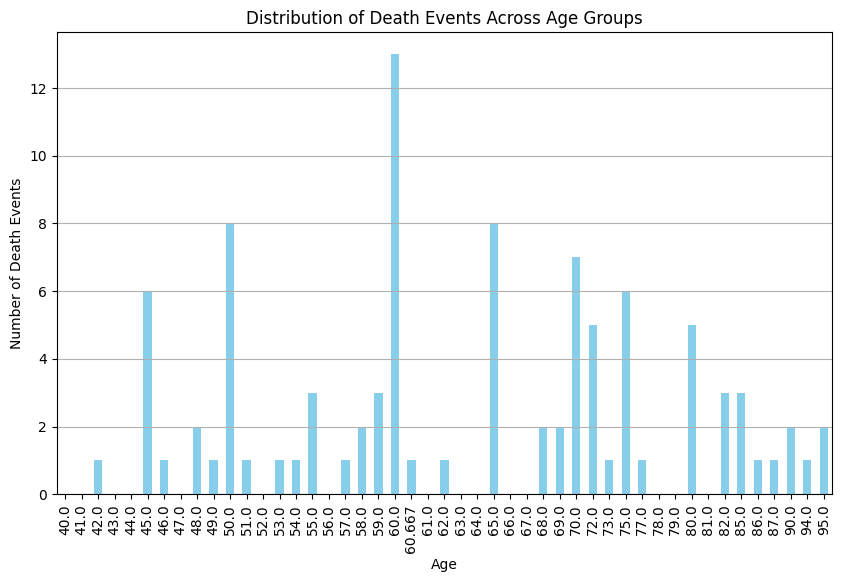

In [96]:
death_events_by_age = df.groupby('age')['DEATH_EVENT'].sum()

# Plot the distribution of death events across different age groups
plt.figure(figsize=(10, 6))
death_events_by_age.plot(kind='bar', color='skyblue')
plt.title('Distribution of Death Events Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Death Events')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


In [ ]:
#9 Is there any significant difference in ejection fraction between patients with and without diabetes?

In [102]:

ejection_fraction_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ejection_fraction_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

mean_ef_diabetes = ejection_fraction_diabetes.mean()
mean_ef_no_diabetes = ejection_fraction_no_diabetes.mean()

# Conduct a statistical test (e.g., t-test) to compare ejection fraction between the two groups
t_stat, p_value = stats.ttest_ind(ejection_fraction_diabetes, ejection_fraction_no_diabetes)

# Print the results
print("Mean ejection fraction for patients with diabetes:", mean_ef_diabetes)
print("Mean ejection fraction for patients without diabetes:", mean_ef_no_diabetes)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in ejection fraction between patients with and without diabetes.")
else:
    print("There is no significant difference in ejection fraction between patients with and without diabetes.")


Mean ejection fraction for patients with diabetes: 38.016
Mean ejection fraction for patients without diabetes: 38.132183908045974
T-statistic: -0.08358970647234736
P-value: 0.9334389630426103
There is no significant difference in ejection fraction between patients with and without diabetes.


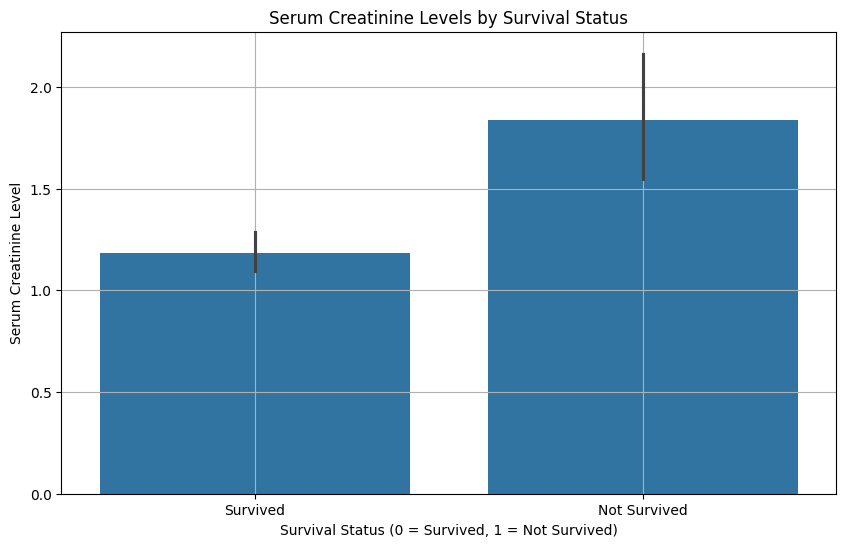

Mean Serum Creatinine Level (Survived): 1.1848768472906404
Mean Serum Creatinine Level (Not Survived): 1.8358333333333334


In [106]:
#10 how does the serum creatinine level vary between patients who survived and those who did not?
creatinine_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
creatinine_not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

# Compare serum creatinine levels
mean_creatinine_survived = creatinine_survived.mean()
mean_creatinine_not_survived = creatinine_not_survived.mean()

# Visualize the distribution of serum creatinine levels for each group
plt.figure(figsize=(10, 6))
sns.barplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status (0 = Survived, 1 = Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.xticks(ticks=[0, 1], labels=['Survived', 'Not Survived'])
plt.grid(True)
plt.show()

# Print mean serum creatinine levels for each group
print("Mean Serum Creatinine Level (Survived):", mean_creatinine_survived)
print("Mean Serum Creatinine Level (Not Survived):", mean_creatinine_not_survived)